In [19]:
%matplotlib widget

In [1]:
import numpy as np
import pandas as pd
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

In [2]:
NUM_SAMPLES = 1000

## Anticausal Shift

Training error:  0.0


C:\Users\Administrator\AppData\Local\Temp\ipykernel_20204\477085188.py:28: UserWarning: No contour levels were found within the data range.
  contour = ax.contour(x1, x2, Z, colors = 'k', levels = [0], alpha = 0.5, linestyles = ['--'])


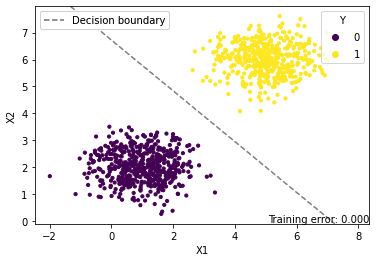

In [36]:
# Y -> X1 and Y -> X2, Y sampled from a bernouli distribution, X1 and X2 are functions of Y and their own noise distributions
# generates 100 samples from a bernouli distribution with p = 0.5, stores the results in a numpy array
Y = np.random.binomial(1, 0.5, NUM_SAMPLES)
# generates X1 and X2 according to Y. When Y is 0, X1 follows a normal distribution N(1,0.8) and X2 follows a normal distribution N(2,0.6); when Y is 1, X1 follows a normal distribution N(3,0.8) and X2 follows a normal distribution N(4,0.6)
X1 = np.random.normal(1, 0.8, NUM_SAMPLES) + 4 * Y
X2 = np.random.normal(2, 0.6, NUM_SAMPLES) + 4 * Y
# creates a SVM classifier with a linear kernel
clf = SVC(kernel = 'linear')
# fits the SVM classifier with X1 and X2 as the features and Y as the labels
clf.fit(np.column_stack((X1, X2)), Y)
# computes the training error of the SVM classifier
print('Training error: ', 1 - clf.score(np.column_stack((X1, X2)), Y))
# plots the scatter plot of X1 and X2 with red for Y = 0 and blue for Y = 1, with the x-axis and y-axis labeled as X1 and X2 respectively, and indicating the Y = 0 and Y = 1 in the legend
fig, ax = plt.subplots()
scatter = ax.scatter(X1, X2, c = Y, s = 10)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Y")
ax.add_artist(legend1)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
# plots the decision boundary of the SVM classifier
x1_min, x1_max = ax.get_xlim()
x2_min, x2_max = ax.get_ylim()
x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
                        np.arange(x2_min, x2_max, 0.01))
Z = clf.predict(np.column_stack((x1.ravel(), x2.ravel())))
Z = Z.reshape(x1.shape)
contour = ax.contour(x1, x2, Z, colors = 'k', levels = [0], alpha = 0.5, linestyles = ['--'])
# add the decision boudary to the legend
h,l = contour.legend_elements()
legend2 = ax.legend([h[0]], ['Decision boundary'], loc = 'upper left')
ax.add_artist(legend2)
# add errors to the legend
plt.text(1, 0, f'Training error: {1 - clf.score(np.column_stack((X1, X2)), Y):.3f}',
     horizontalalignment='right',
     verticalalignment='bottom',
     transform = ax.transAxes)

plt.savefig('../figure/anticausal_true.png',dpi=330)
plt.show()

Training error:  0.0
Training error:  0.0


C:\Users\Administrator\AppData\Local\Temp\ipykernel_20204\3380384830.py:25: UserWarning: No contour levels were found within the data range.
  contour = ax.contour(x1, x2, Z, colors = 'k', levels = [0], alpha = 0.5, linestyles = ['--'])
C:\Users\Administrator\AppData\Local\Temp\ipykernel_20204\3380384830.py:32: UserWarning: No contour levels were found within the data range.
  contour_1 = ax.contour(x1, x2, Z, colors = 'r', levels = [0], alpha = 0.5, linestyles = ['--'])


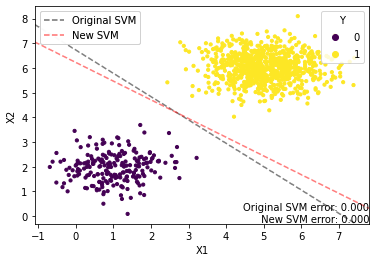

In [37]:
# Y -> X1 and Y -> X2
# Now changes the probability of Y, and repeats the above steps
Y = np.random.binomial(1, 0.8, NUM_SAMPLES)
X1 = np.random.normal(1, 0.8, NUM_SAMPLES) + 4 * Y
X2 = np.random.normal(2, 0.6, NUM_SAMPLES) + 4 * Y
# Errors using the same classifier as above
print('Training error: ', 1 - clf.score(np.column_stack((X1, X2)), Y))
# creates a SVM classifier with a linear kernel
clf_2 = SVC(kernel = 'linear')
# fits the SVM classifier with X1 and X2 as the features and Y as the labels
clf_2.fit(np.column_stack((X1, X2)), Y)
# computes the training error of the SVM classifier
print('Training error: ', 1 - clf_2.score(np.column_stack((X1, X2)), Y))
fig, ax = plt.subplots()
scatter = ax.scatter(X1, X2, c = Y, s = 10)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Y")
# plots the decision boundary of the two SVM classifier
x1_min, x1_max = ax.get_xlim()
x2_min, x2_max = ax.get_ylim()
x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
                        np.arange(x2_min, x2_max, 0.01))
Z = clf.predict(np.column_stack((x1.ravel(), x2.ravel())))
Z = Z.reshape(x1.shape)
contour = ax.contour(x1, x2, Z, colors = 'k', levels = [0], alpha = 0.5, linestyles = ['--'])
x1_min, x1_max = ax.get_xlim()
x2_min, x2_max = ax.get_ylim()
x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
                        np.arange(x2_min, x2_max, 0.01))
Z = clf_2.predict(np.column_stack((x1.ravel(), x2.ravel())))
Z = Z.reshape(x1.shape)
contour_1 = ax.contour(x1, x2, Z, colors = 'r', levels = [0], alpha = 0.5, linestyles = ['--'])
# add the decision boudary to the legend
h,l = contour.legend_elements()
h_1,l_1 = contour_1.legend_elements()
legend2 = ax.legend([h[0],h_1[0]], ['Original SVM','New SVM'], loc = 'upper left')
ax.add_artist(legend2)
ax.add_artist(legend1)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
# add errors to the legend
plt.text(1, 0, f'Original SVM error: {1 - clf.score(np.column_stack((X1, X2)), Y):.3f}\n New SVM error: {1 - clf_2.score(np.column_stack((X1, X2)), Y):.3f}',
     horizontalalignment='right',
     verticalalignment='bottom',
     transform = ax.transAxes)

plt.savefig('../figure/anticausal_intervene_Y.png',dpi=330)
plt.show()

Testing error:  0.487
Training error:  0.15200000000000002


C:\Users\Administrator\AppData\Local\Temp\ipykernel_20204\1968632375.py:24: UserWarning: No contour levels were found within the data range.
  contour = ax.contour(x1, x2, Z, colors = 'k', levels = [0], alpha = 0.5, linestyles = ['--'])
C:\Users\Administrator\AppData\Local\Temp\ipykernel_20204\1968632375.py:31: UserWarning: No contour levels were found within the data range.
  contour_1 = ax.contour(x1, x2, Z, colors = 'r', levels = [0], alpha = 0.5, linestyles = ['--'])


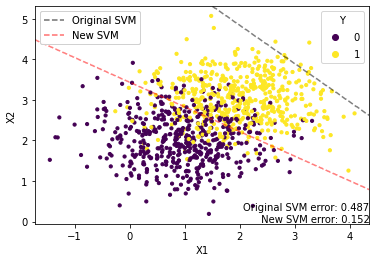

In [38]:
# Now changes the coefficient of Y in X1 and X2 and repeats the above steps
Y = np.random.binomial(1, 0.5, NUM_SAMPLES)
X1 = np.random.normal(1, 0.8, NUM_SAMPLES) + 1 * Y
X2 = np.random.normal(2, 0.6, NUM_SAMPLES) + 1 * Y
# Errors using the same classifier as above
print('Testing error: ', 1 - clf.score(np.column_stack((X1, X2)), Y))
# creates a SVM classifier with a linear kernel
clf_3 = SVC(kernel = 'linear')
# fits the SVM classifier with X1 and X2 as the features and Y as the labels
clf_3.fit(np.column_stack((X1, X2)), Y)
# computes the training error of the SVM classifier
print('Training error: ', 1 - clf_3.score(np.column_stack((X1, X2)), Y))
fig, ax = plt.subplots()
scatter = ax.scatter(X1, X2, c = Y, s = 10)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Y")
# plots the decision boundary of the two SVM classifier
x1_min, x1_max = ax.get_xlim()
x2_min, x2_max = ax.get_ylim()
x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
                        np.arange(x2_min, x2_max, 0.01))
Z = clf.predict(np.column_stack((x1.ravel(), x2.ravel())))
Z = Z.reshape(x1.shape)
contour = ax.contour(x1, x2, Z, colors = 'k', levels = [0], alpha = 0.5, linestyles = ['--'])
x1_min, x1_max = ax.get_xlim()
x2_min, x2_max = ax.get_ylim()
x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
                        np.arange(x2_min, x2_max, 0.01))
Z = clf_3.predict(np.column_stack((x1.ravel(), x2.ravel())))
Z = Z.reshape(x1.shape)
contour_1 = ax.contour(x1, x2, Z, colors = 'r', levels = [0], alpha = 0.5, linestyles = ['--'])
# add the decision boudary to the legend
h,l = contour.legend_elements()
h_1,l_1 = contour_1.legend_elements()
legend2 = ax.legend([h[0],h_1[0]], ['Original SVM','New SVM'], loc = 'upper left')
ax.add_artist(legend2)
ax.add_artist(legend1)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
# add errors to the legend
plt.text(1, 0, f'Original SVM error: {1 - clf.score(np.column_stack((X1, X2)), Y):.3f}\n New SVM error: {1 - clf_3.score(np.column_stack((X1, X2)), Y):.3f}',
     horizontalalignment='right',
     verticalalignment='bottom',
     transform = ax.transAxes)

plt.savefig('../figure/anticausal_intervene_X.png',dpi=330)
plt.show()

Testing error:  0.777
Training error:  0.10399999999999998


C:\Users\Administrator\AppData\Local\Temp\ipykernel_20204\1560521954.py:24: UserWarning: No contour levels were found within the data range.
  contour = ax.contour(x1, x2, Z, colors = 'k', levels = [0], alpha = 0.5, linestyles = ['--'])
C:\Users\Administrator\AppData\Local\Temp\ipykernel_20204\1560521954.py:31: UserWarning: No contour levels were found within the data range.
  contour_1 = ax.contour(x1, x2, Z, colors = 'r', levels = [0], alpha = 0.5, linestyles = ['--'])


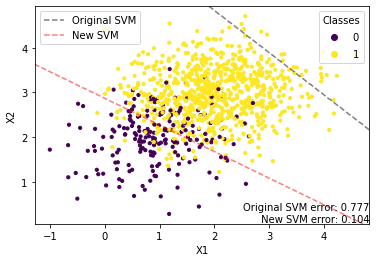

In [39]:
# Now changes the coefficient of Y in X1 and X2 from 2 to 4, and changes the probability of Y being 0 to 0.3, and repeats the above steps
Y = np.random.binomial(1, 0.8, NUM_SAMPLES)
X1 = np.random.normal(1, 0.8, NUM_SAMPLES) + 1 * Y
X2 = np.random.normal(2, 0.6, NUM_SAMPLES) + 1 * Y
# Errors using the same classifier as above
print('Testing error: ', 1 - clf.score(np.column_stack((X1, X2)), Y))
# creates a SVM classifier with a linear kernel
clf_4 = SVC(kernel = 'linear')
# fits the SVM classifier with X1 and X2 as the features and Y as the labels
clf_4.fit(np.column_stack((X1, X2)), Y)
# computes the training error of the SVM classifier
print('Training error: ', 1 - clf_4.score(np.column_stack((X1, X2)), Y))
fig, ax = plt.subplots()
scatter = ax.scatter(X1, X2, c = Y, s = 10)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Classes")
# plots the decision boundary of the two SVM classifier
x1_min, x1_max = ax.get_xlim()
x2_min, x2_max = ax.get_ylim()
x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
                        np.arange(x2_min, x2_max, 0.01))
Z = clf.predict(np.column_stack((x1.ravel(), x2.ravel())))
Z = Z.reshape(x1.shape)
contour = ax.contour(x1, x2, Z, colors = 'k', levels = [0], alpha = 0.5, linestyles = ['--'])
x1_min, x1_max = ax.get_xlim()
x2_min, x2_max = ax.get_ylim()
x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
                        np.arange(x2_min, x2_max, 0.01))
Z = clf_4.predict(np.column_stack((x1.ravel(), x2.ravel())))
Z = Z.reshape(x1.shape)
contour_1 = ax.contour(x1, x2, Z, colors = 'r', levels = [0], alpha = 0.5, linestyles = ['--'])
# add the decision boudary to the legend
h,l = contour.legend_elements()
h_1,l_1 = contour_1.legend_elements()
legend2 = ax.legend([h[0],h_1[0]], ['Original SVM','New SVM'], loc = 'upper left')
ax.add_artist(legend1)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
# add errors to the legend
plt.text(1, 0, f'Original SVM error: {1 - clf.score(np.column_stack((X1, X2)), Y):.3f}\n New SVM error: {1 - clf_4.score(np.column_stack((X1, X2)), Y):.3f}',
     horizontalalignment='right',
     verticalalignment='bottom',
     transform = ax.transAxes)
plt.savefig('../figure/anticausal_intervene_X_Y.png',dpi=330)
plt.show()

## Covariate shift

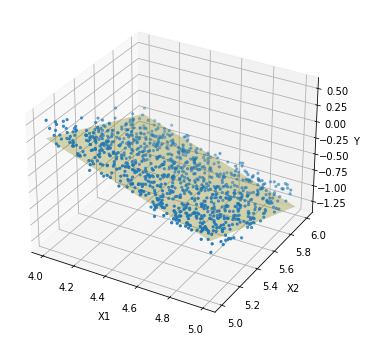

In [47]:
# Generate X1, X2 and Y
X1 = np.random.uniform(4, 5, NUM_SAMPLES)
X2 = np.random.uniform(5, 6, NUM_SAMPLES)
Y = np.sin(X1+X2) + np.random.normal(0, 0.1, NUM_SAMPLES)
 # Fit a linear model to Y vs X1 and X2
model = LinearRegression()
X = np.column_stack((X1, X2))
model.fit(X, Y)
coef = model.coef_
intercept = model.intercept_
 # Create a 3D scatter plot of X1, X2 and Y
fig = plt.figure(figsize=(6,6))
ax = plt.axes(projection='3d')
ax.scatter3D(X1, X2, Y, s=5)
 # Add a linear fitted plane to the plot
x1_surf, x2_surf = np.meshgrid(np.linspace(4, 5, 10), np.linspace(5, 6, 10))
y_surf = coef[0]*x1_surf + coef[1]*x2_surf + intercept
ax.plot_surface(x1_surf, x2_surf, y_surf, color='yellow', alpha=0.3)
 # Set the axis labels and title
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
# ax.set_title('3D Scatter Plot with Linear Fitted Plane')
plt.savefig('../figure/Causal_true.png', dpi = 300,format = 'png')
plt.show()

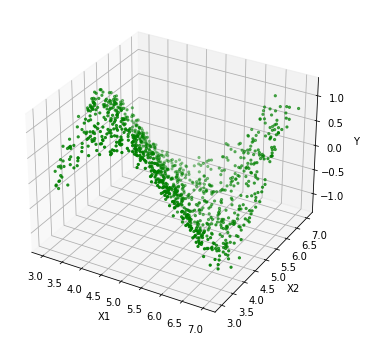

In [46]:
# X1 -> Y. X2 -> Y. X1 and X2 are independent. Y = sin(X1+X2) + noise
X1 = np.random.uniform(3, 7, NUM_SAMPLES)
X2 = np.random.uniform(3, 7, NUM_SAMPLES)
Y = np.sin(X1+X2) + np.random.normal(0, 0.1, NUM_SAMPLES)
# plots X1, X2 and Y in a 3D scatter plot, with the x-axis, y-axis and z-axis labeled as X1, X2 and Y respectively
fig = plt.figure(figsize=(6,6))
ax = plt.axes(projection='3d')
ax.scatter3D(X1, X2, Y, color='green', s=5)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
 # Save the figure
plt.savefig('../figure/causal_intervene_X.png', dpi = 300,format = 'png')
 # Show the figure
plt.show()


## Generalized Covariate Shift

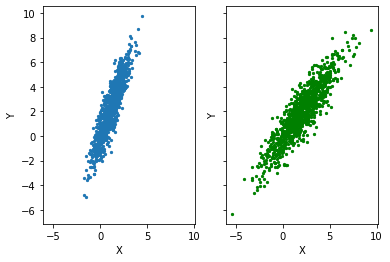

In [32]:
# X -> Y
# generates NUM_SAMPLES samples from a normal distribution N(1,1) and stores the results in a numpy array
X = np.random.normal(1, 1, NUM_SAMPLES)
# Y = 2*X + noise, where noise is sampled from a normal distribution N(0,1)
Y = 2*X + np.random.normal(0, 1, NUM_SAMPLES)
# change the distribution of X to N(2,4) and repeat the above steps
X_new = np.random.normal(2, 2, NUM_SAMPLES)
Y_new = X_new + np.random.normal(0, 1, NUM_SAMPLES)
# plots X and Y in a scatter plot, with the x-axis and y-axis labeled as X and Y respectively
fig, axs = plt.subplots(1,2,sharex=True, sharey=True)
axs[0].scatter(X, Y, s = 5)
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[1].scatter(X_new, Y_new, color = "green",s = 5)
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')

plt.savefig('../figure/causal_intervene_X_Y.png',dpi=330,format='png')
plt.show()